In [67]:
import numpy as np
from collections import Counter

def manhattan(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

def step(cx, cy, tx, ty, lrx, lry):
    dc = manhattan(cx, cy, tx, ty)
    dl = manhattan(lrx, lry, tx, ty)
    if dl < dc-1:
        return lrx, lry
    if cx < tx:
        cx += 1
    elif cx > tx:
        cx -= 1
    else:
        if cy < ty:
            cy += 1
        elif cy > ty:
            cy -= 1
    return cx, cy


N = 501
#reference = sample_lr(0, 0, N, ALPHA)

precomputed = np.zeros((N*2, N*2))
for i in range(N*2):
    for j in range(N*2):
        precomputed[i, j] = manhattan(i,j, N, N)

def fast_distance_mtx(cx, cy):
    xstart = N - cx
    ystart = N - cy
    return precomputed[xstart:xstart+N, ystart:ystart+N]

def fast_proba_mtx(cx, cy):
    xstart = N - cx
    ystart = N - cy
    return precomputed_proba[xstart:xstart+N, ystart:ystart+N]



def sample_lr(cx, cy, n, alpha):
    #distance_matrix = np.zeros((n, n))
    #proba_matrix = np.zeros((n, n))
    #distance_matrix = fast_distance_mtx(cx, cy)
    
    #cnt = Counter(distance_matrix.flatten().tolist())

    """for i in range(n):
        for j in range(n):
            d = distance_matrix[i, j]
            if d <= 1:
                continue
            proba_matrix[i, j] = (d ** -alpha)# / cnt[d]
    """

    proba_matrix = fast_proba_mtx(cx, cy)

    proba_matrix /= np.sum(proba_matrix)

    probas = proba_matrix.flatten()
    indices = np.arange(n**2)
    choice = np.random.choice(indices, p=probas)
    tx, ty = choice // n, choice % n
    return tx, ty


#ALPHA = 1.0

distances = {}
from tqdm import tqdm
for alpha in np.linspace(0, 2.5, 13):
    precomputed_proba = np.zeros((N*2, N*2))
    for i in range(N*2):
        for j in range(N*2):
            d = precomputed[i, j]
            if d <= 1:
                continue
            precomputed_proba[i, j] = d ** -alpha
    distances[alpha] = []

    for _ in tqdm(range(50), total=50):
        cx, cy = (np.random.randint(0, N), np.random.randint(0, N))
        tx, ty = (np.random.randint(0, N), np.random.randint(0, N))
        steps = 0
        while not (cx == tx and cy == ty):
            steps += 1
            cx, cy = step(cx, cy, tx, ty, *sample_lr(cx, cy, N, alpha))
        
        distances[alpha].append(steps)

 88%|████████▊ | 44/50 [00:15<00:01,  3.21it/s]

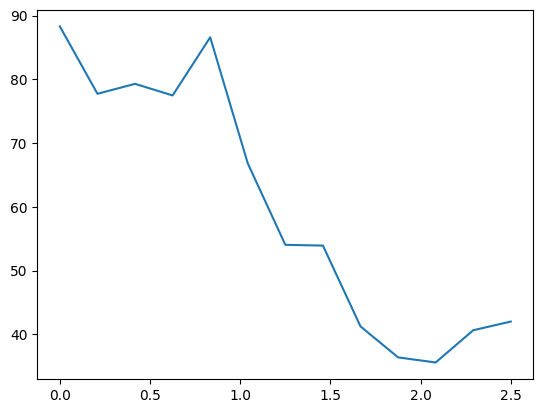

In [64]:
import matplotlib.pyplot as plt

plt.plot(distances.keys(), [np.mean(distances[alpha]) for alpha in distances.keys()])